#Advanced Machine learning project


In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='talk', font_scale=0.8, rc={'figure.figsize': (8,6)})
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [3]:
car_sales = pd.read_csv('/content/drive/MyDrive/AML_assignment/adverts.csv')

In [4]:
car_sales.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


## 1. Data Processing for Machine Learning

In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [6]:
####finding the missing values in the columns
 

In [7]:
car_sales.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [8]:
car_sales['mileage'].isna().value_counts()

False    401878
True        127
Name: mileage, dtype: int64

In [9]:
car_sales['mileage']=car_sales['mileage'].fillna(car_sales['mileage'].mean())

In [10]:
car_sales['year_of_registration'].isna().value_counts()

False    368694
True      33311
Name: year_of_registration, dtype: int64

In [11]:
car_sales['year_of_registration']= np.where((car_sales['year_of_registration'].isna())&(car_sales['vehicle_condition']=='NEW'),2021.0,car_sales['year_of_registration'])

In [12]:
car_sales['year_of_registration'].isna().value_counts()

False    399943
True       2062
Name: year_of_registration, dtype: int64

In [13]:
car_sales['standard_colour'].isna().value_counts()

False    396627
True       5378
Name: standard_colour, dtype: int64

In [14]:
car_sales['fuel_type'].isna().value_counts()

False    401404
True        601
Name: fuel_type, dtype: int64

In [15]:
car_sales['fuel_type']= car_sales['fuel_type'].fillna(car_sales['fuel_type'].mode()[0])

In [16]:
car_sales['standard_colour']=car_sales['standard_colour'].fillna(car_sales['standard_colour'].mode()[0])

In [17]:
car_sales['body_type'].isna().value_counts()

False    401168
True        837
Name: body_type, dtype: int64

In [18]:
car_sales['body_type'] = car_sales['body_type'].fillna(car_sales['body_type'].mode()[0])

In [19]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                402005 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        402005 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   399943 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              402005 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [20]:
car_sales = car_sales.drop(columns=['reg_code'])

In [21]:
car_copy = car_sales.dropna()

In [22]:
car_copy = car_copy.set_index('public_reference')

In [23]:
car_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399943 entries, 202006039777689 to 201512149444029
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                399943 non-null  float64
 1   standard_colour        399943 non-null  object 
 2   standard_make          399943 non-null  object 
 3   standard_model         399943 non-null  object 
 4   vehicle_condition      399943 non-null  object 
 5   year_of_registration   399943 non-null  float64
 6   price                  399943 non-null  int64  
 7   body_type              399943 non-null  object 
 8   crossover_car_and_van  399943 non-null  bool   
 9   fuel_type              399943 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 30.9+ MB


In [24]:
car_copy['mileage'].describe()

count    399943.000000
mean      37787.088298
std       34847.925441
min           0.000000
25%       10500.000000
50%       28700.000000
75%       57000.000000
max      999999.000000
Name: mileage, dtype: float64

In [25]:
#####To Find the outliers and noise in the distribution of the data, visualization of the data is useful  

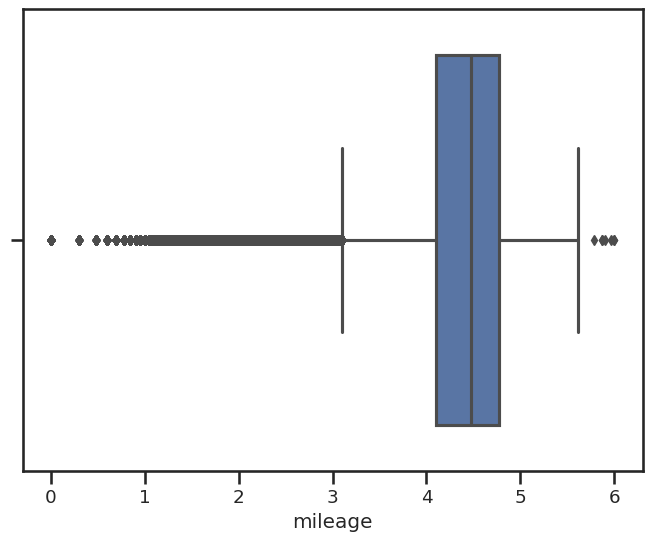

In [26]:
sns.boxplot(x=np.log10(car_copy.loc[ car_copy['mileage']>0,'mileage']));

In [27]:
car_copy[car_copy['mileage']>300000].sort_values(by='mileage')

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,
202010315659240,300050.0,Black,SEAT,Alhambra,USED,2009.0,999,MPV,False,Diesel
202009133689548,307426.0,Black,Audi,A6 Saloon,USED,2011.0,3350,Saloon,False,Diesel
202010104843855,310000.0,Black,London Taxis International,TX4,USED,2008.0,1495,MPV,False,Diesel
202009224069738,310000.0,Black,London Taxis International,TX4,USED,2010.0,2499,MPV,False,Diesel
202010305601646,311777.0,Black,Volkswagen,Passat,USED,2004.0,890,Saloon,False,Diesel
202010285550831,314135.0,White,Carbodies,Black Cab,USED,1997.0,2950,Estate,False,Diesel
202010285545599,322000.0,Black,London Taxis International,TXI,USED,2005.0,995,Hatchback,False,Diesel
202010215275066,324000.0,Silver,SKODA,Octavia,USED,2006.0,595,Hatchback,False,Diesel
202009304421979,329000.0,Black,Volkswagen,Sharan,USED,2004.0,795,MPV,False,Diesel


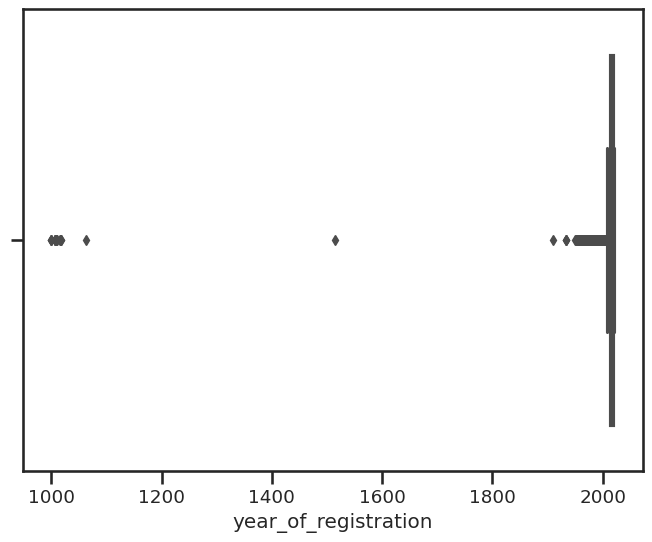

In [28]:
sns.boxplot(x=car_copy['year_of_registration']);

In [29]:
car_copy[car_copy['year_of_registration']<1956].sort_values('year_of_registration')

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,
202009304380359,54569.0,Silver,BMW,Z4,USED,999.0,7999,Convertible,False,Petrol
202010155037484,69346.0,Red,Mazda,Mazda3,USED,999.0,8795,Saloon,False,Petrol
202010094789497,107934.0,Blue,Audi,A3,USED,999.0,8895,Hatchback,False,Diesel
202008042076722,58000.0,Silver,Toyota,RAV4,USED,1006.0,5994,SUV,False,Petrol
202008042076716,19000.0,Silver,Mercedes-Benz,C Class,USED,1007.0,7295,Saloon,False,Petrol
202006270588110,14000.0,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
202006270588115,38000.0,White,MINI,Hatch,USED,1007.0,4795,Hatchback,False,Petrol
202010225311657,104000.0,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol
202008102305925,30000.0,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol


In [30]:
car_copy['price'].describe()

count    3.999430e+05
mean     1.710877e+04
std      2.495890e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.259000e+04
75%      1.999900e+04
max      3.799995e+06
Name: price, dtype: float64

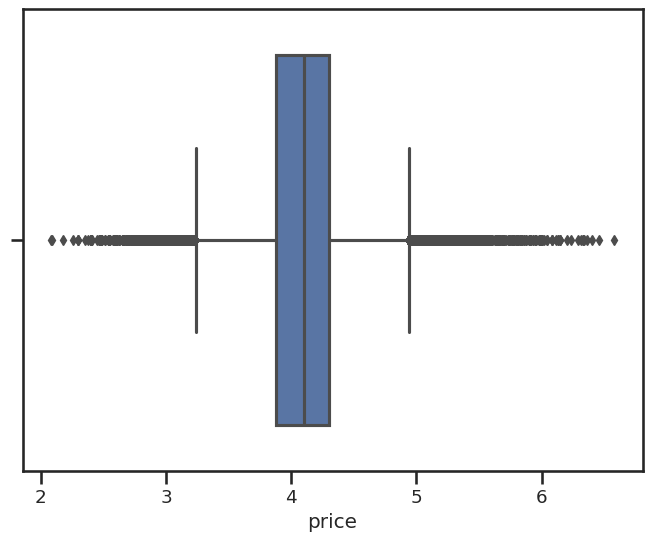

In [31]:
sns.boxplot(x=np.log10(car_copy.loc[car_copy['price']>0,'price']));

In [32]:
car_copy[car_copy['price']<1000].sort_values('price')

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,
202010315653263,78000.0,Blue,Citroen,Saxo,USED,2000.0,120,Hatchback,False,Petrol
202011015671489,89000.0,Green,Vauxhall,Corsa,USED,2000.0,122,Hatchback,False,Petrol
202010195173556,159000.0,Bronze,Honda,HR-V,USED,2000.0,150,SUV,False,Petrol
202010295564975,117500.0,Green,Citroen,C3,USED,2002.0,180,Hatchback,False,Petrol
202010255428448,128000.0,Silver,Citroen,Xsara Picasso,USED,2002.0,200,MPV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...
202010265442669,159000.0,Red,Renault,Laguna,USED,2003.0,999,Estate,False,Diesel
202010024508947,109000.0,Grey,Peugeot,207,USED,2007.0,999,Hatchback,False,Petrol
202010285515419,78345.0,Blue,Vauxhall,Astra,USED,2005.0,999,Hatchback,False,Petrol


In [33]:
car_copy[car_copy['price']>100000].sort_values('price',ascending = False)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,
202008252907180,300.0,Black,Ferrari,LaFerrari,USED,2017.0,3799995,Hatchback,False,Petrol
202002257718775,4400.0,Black,Bugatti,Veyron,USED,2014.0,2850000,Coupe,False,Petrol
202007081011555,1000.0,Blue,Bugatti,Chiron,USED,2018.0,2500000,Coupe,False,Petrol
202007010711087,475.0,Yellow,Ferrari,LaFerrari,USED,2015.0,2299950,Coupe,False,Petrol
202006150151007,2247.0,Red,Ferrari,LaFerrari,USED,2014.0,2195000,Coupe,False,Petrol Plug-in Hybrid
...,...,...,...,...,...,...,...,...,...,...
202004098902528,0.0,Grey,Land Rover,Range Rover,NEW,2021.0,100559,SUV,False,Diesel
202008072207269,0.0,Grey,Audi,RS7,NEW,2021.0,100376,Hatchback,False,Petrol
202008192658480,0.0,Grey,Jaguar,F-Type,NEW,2021.0,100135,Coupe,False,Petrol


Take a subset of the dataframe after removing the outliers and noise in the columns of price, mileage and year_of_registration.

In [34]:
car_pro = car_copy.loc[(car_copy['mileage']<500000)&(car_copy['price']>500)&(car_copy['year_of_registration']>=1933)]

In [35]:
car_pro

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
public_reference,,,,,,,,,,
202006039777689,0.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
202007020778260,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
202007020778474,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
202007080986776,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
202007161321269,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...
202010315652942,5179.0,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
202010315657341,110000.0,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
202010315659271,52760.0,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol


In [36]:
car_pro['vehicle_condition'].value_counts()

USED    368290
NEW      31249
Name: vehicle_condition, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
lab = LabelEncoder()
ohe = OneHotEncoder()

In [39]:
car_pro['standard_colour'] = lab.fit_transform(car_pro['standard_colour'])

<ipython-input-39-8041ae4ff581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_pro['standard_colour'] = lab.fit_transform(car_pro['standard_colour'])


In [40]:
car_pro['standard_make'] = lab.fit_transform(car_pro['standard_make'])

<ipython-input-40-37b282d31faf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_pro['standard_make'] = lab.fit_transform(car_pro['standard_make'])


In [41]:
car_pro['standard_model'] = lab.fit_transform(car_pro['standard_model'])

<ipython-input-41-2ffe23549f7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_pro['standard_model'] = lab.fit_transform(car_pro['standard_model'])


In [42]:
car_pro['body_type'] = lab.fit_transform(car_pro['body_type'])

<ipython-input-42-30abf5c8bd72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_pro['body_type'] = lab.fit_transform(car_pro['body_type'])


In [43]:
car_pro['fuel_type'] = lab.fit_transform(car_pro['fuel_type'])

<ipython-input-43-e6438cfebd82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_pro['fuel_type'] = lab.fit_transform(car_pro['fuel_type'])


In [44]:
pd.get_dummies(car_pro['vehicle_condition']).head()

,NEW,USED
public_reference,,
202006039777689,1,0
202007020778260,0,1
202007020778474,0,1
202007080986776,0,1
202007161321269,0,1


In [45]:
veh_con = pd.get_dummies(car_pro['vehicle_condition'],prefix = 'vehicle_condition')

In [46]:
car_pro_ohe = pd.concat([car_pro.drop(columns=['vehicle_condition','crossover_car_and_van']),veh_con],axis=1)

In [47]:
car_pro_ohe

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,vehicle_condition_NEW,vehicle_condition_USED
public_reference,,,,,,,,,,
202006039777689,0.0,8,104,1091,2021.0,73970,13,8,1,0
202007020778260,108230.0,2,46,1094,2011.0,7000,14,1,0,1
202007020778474,7800.0,8,89,1114,2017.0,14000,13,6,0,1
202007080986776,45000.0,4,102,689,2016.0,7995,7,1,0,1
202007161321269,64000.0,8,53,819,2015.0,26995,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...
202010315652942,5179.0,8,76,41,2019.0,10595,7,6,0,1
202010315657341,110000.0,17,76,6,2009.0,2000,7,6,0,1
202010315659271,52760.0,20,71,784,2012.0,7250,13,6,0,1


In [48]:
car_pro['crossover_car_and_van'].value_counts()

False    397767
True       1772
Name: crossover_car_and_van, dtype: int64

Since there is negligible number of vehicles with crossover car and van true, that column is dropped. Then 10% of the original dataset is chosen as the sample to perform machine learning algorithm.

In [49]:
car_sample = car_pro_ohe.sample(frac=0.1,random_state=0)

In [50]:
car_sample

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,vehicle_condition_NEW,vehicle_condition_USED
public_reference,,,,,,,,,,
202010054627592,89000.0,2,60,550,2015.0,6340,7,1,0,1
202009113621426,48700.0,20,7,187,2016.0,20791,7,1,0,1
202009264230371,9638.0,17,99,193,2018.0,8990,7,6,0,1
202008132445065,1457.0,8,63,301,2020.0,23495,13,6,0,1
202010315652189,10657.0,2,10,128,2018.0,29490,14,1,0,1
...,...,...,...,...,...,...,...,...,...,...
202008172595793,68000.0,18,102,1044,2006.0,1950,7,6,0,1
201910063026527,4665.0,20,102,232,2019.0,14777,7,1,0,1
202007171364857,21921.0,18,99,193,2017.0,7690,7,6,0,1


In [51]:
# X, y split
X = car_sample.drop(columns=['price'])
y = car_sample['price']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


# 2. Feature Engineering

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [55]:
from sklearn.model_selection import GridSearchCV, ParameterGrid, cross_val_score

In [56]:
car_lm = LinearRegression()

In [57]:
car_lm.fit(X_train,y_train)

LinearRegression()

In [58]:
from functools import partial
rmse = partial(mean_squared_error, squared=False)

In [59]:
rmse(y_test, car_lm.predict(X_test))

18289.90752550435

In [60]:
### Polynomial Feature Engineering

In [61]:
 pp = Pipeline(
steps=[
('scl', StandardScaler()),
('poly', PolynomialFeatures(degree=2, include_bias=False))
]
).set_output(transform="pandas")
pipe = Pipeline(steps=[
('pp', pp),
('est', Ridge(alpha=0.1))
]).set_output(transform="pandas")


In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 Pipeline(steps=[('scl', StandardScaler()),
                                 ('poly',
                                  PolynomialFeatures(include_bias=False))])),
                ('est', Ridge(alpha=0.1))])

In [63]:
 X_poly = pipe['pp'].transform(X_train)

In [64]:
X_poly.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,vehicle_condition_NEW,vehicle_condition_USED,mileage^2,...,body_type^2,body_type fuel_type,body_type vehicle_condition_NEW,body_type vehicle_condition_USED,fuel_type^2,fuel_type vehicle_condition_NEW,fuel_type vehicle_condition_USED,vehicle_condition_NEW^2,vehicle_condition_NEW vehicle_condition_USED,vehicle_condition_USED^2
public_reference,,,,,,,,,,,,,,,,,,,,,
202010024511454,0.118669,-1.134797,0.675934,1.457143,-1.234418,-0.645836,0.774569,-0.294442,0.294442,0.014082,...,0.417104,-0.500245,0.190162,-0.190162,0.599958,-0.228066,0.228066,0.086696,-0.086696,0.086696
202010094802414,0.855722,-0.240091,-1.152818,-0.751478,-1.905141,-0.645836,0.774569,-0.294442,0.294442,0.732261,...,0.417104,-0.500245,0.190162,-0.190162,0.599958,-0.228066,0.228066,0.086696,-0.086696,0.086696
202007010752606,-0.964319,0.910246,1.206862,0.026289,0.777750,1.151565,-1.218504,-0.294442,0.294442,0.929910,...,1.326103,-1.403187,-0.339070,0.339070,1.484752,0.358779,-0.358779,0.086696,-0.086696,0.086696
202010225293660,0.902029,1.293692,1.206862,1.780718,-0.116547,-0.046702,0.774569,-0.294442,0.294442,0.813655,...,0.002181,-0.036174,0.013751,-0.013751,0.599958,-0.228066,0.228066,0.086696,-0.086696,0.086696
202010144973175,-0.177083,-0.240091,0.292486,0.750622,0.554176,1.151565,-1.218504,-0.294442,0.294442,0.031358,...,1.326103,-1.403187,-0.339070,0.339070,1.484752,0.358779,-0.358779,0.086696,-0.086696,0.086696


In [65]:
rmse(y_test, pipe.predict(X_test))

16823.474817441664

Using polymonial degree 3, the train data is fitted


In [66]:
pp = Pipeline(
steps=[
('scl', StandardScaler()),
('poly', PolynomialFeatures(degree=3, include_bias=False))
]
).set_output(transform="pandas")
pipe = Pipeline(steps=[
('pp', pp),
('est', Ridge(alpha=0.1))
]).set_output(transform="pandas")

In [67]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 Pipeline(steps=[('scl', StandardScaler()),
                                 ('poly',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False))])),
                ('est', Ridge(alpha=0.1))])

In [68]:
X_poly3= pipe['pp'].transform(X_train)

In [69]:
X_poly3.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,vehicle_condition_NEW,vehicle_condition_USED,mileage^2,...,fuel_type^3,fuel_type^2 vehicle_condition_NEW,fuel_type^2 vehicle_condition_USED,fuel_type vehicle_condition_NEW^2,fuel_type vehicle_condition_NEW vehicle_condition_USED,fuel_type vehicle_condition_USED^2,vehicle_condition_NEW^3,vehicle_condition_NEW^2 vehicle_condition_USED,vehicle_condition_NEW vehicle_condition_USED^2,vehicle_condition_USED^3
public_reference,,,,,,,,,,,,,,,,,,,,,
202010024511454,0.118669,-1.134797,0.675934,1.457143,-1.234418,-0.645836,0.774569,-0.294442,0.294442,0.014082,...,0.464709,-0.176653,0.176653,0.067152,-0.067152,0.067152,-0.025527,0.025527,-0.025527,0.025527
202010094802414,0.855722,-0.240091,-1.152818,-0.751478,-1.905141,-0.645836,0.774569,-0.294442,0.294442,0.732261,...,0.464709,-0.176653,0.176653,0.067152,-0.067152,0.067152,-0.025527,0.025527,-0.025527,0.025527
202007010752606,-0.964319,0.910246,1.206862,0.026289,0.777750,1.151565,-1.218504,-0.294442,0.294442,0.929910,...,-1.809176,-0.437174,0.437174,-0.105640,0.105640,-0.105640,-0.025527,0.025527,-0.025527,0.025527
202010225293660,0.902029,1.293692,1.206862,1.780718,-0.116547,-0.046702,0.774569,-0.294442,0.294442,0.813655,...,0.464709,-0.176653,0.176653,0.067152,-0.067152,0.067152,-0.025527,0.025527,-0.025527,0.025527
202010144973175,-0.177083,-0.240091,0.292486,0.750622,0.554176,1.151565,-1.218504,-0.294442,0.294442,0.031358,...,-1.809176,-0.437174,0.437174,-0.105640,0.105640,-0.105640,-0.025527,0.025527,-0.025527,0.025527


In [70]:
rmse(y_test, pipe.predict(X_test))

15855.719548121717

In [71]:
from sklearn.dummy import DummyRegressor


The train data is engineered using the interaction feature.

In [72]:
preprocessing_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
    ]
).set_output(transform='pandas')

In [73]:
pipe_int = Pipeline(
    steps=[
        ('pp', preprocessing_pipe),
        ('regr', Ridge(alpha=0.01))
    ]
)

In [74]:
pipe_int.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('poly',
                                  PolynomialFeatures(include_bias=False,
                                                     interaction_only=True))])),
                ('regr', Ridge(alpha=0.01))])

In [75]:
pipe_int['pp'].transform(X_train).head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,vehicle_condition_NEW,vehicle_condition_USED,mileage standard_colour,...,year_of_registration body_type,year_of_registration fuel_type,year_of_registration vehicle_condition_NEW,year_of_registration vehicle_condition_USED,body_type fuel_type,body_type vehicle_condition_NEW,body_type vehicle_condition_USED,fuel_type vehicle_condition_NEW,fuel_type vehicle_condition_USED,vehicle_condition_NEW vehicle_condition_USED
public_reference,,,,,,,,,,,,,,,,,,,,,
202010024511454,0.118669,-1.134797,0.675934,1.457143,-1.234418,-0.645836,0.774569,-0.294442,0.294442,-0.134665,...,0.797232,-0.956142,0.363465,-0.363465,-0.500245,0.190162,-0.190162,-0.228066,0.228066,-0.086696
202010094802414,0.855722,-0.240091,-1.152818,-0.751478,-1.905141,-0.645836,0.774569,-0.294442,0.294442,-0.205451,...,1.230408,-1.475664,0.560954,-0.560954,-0.500245,0.190162,-0.190162,-0.228066,0.228066,-0.086696
202007010752606,-0.964319,0.910246,1.206862,0.026289,0.777750,1.151565,-1.218504,-0.294442,0.294442,-0.877767,...,0.895630,-0.947691,-0.229003,0.229003,-1.403187,-0.339070,0.339070,0.358779,-0.358779,-0.086696
202010225293660,0.902029,1.293692,1.206862,1.780718,-0.116547,-0.046702,0.774569,-0.294442,0.294442,1.166947,...,0.005443,-0.090274,0.034316,-0.034316,-0.036174,0.013751,-0.013751,-0.228066,0.228066,-0.086696
202010144973175,-0.177083,-0.240091,0.292486,0.750622,0.554176,1.151565,-1.218504,-0.294442,0.294442,0.042516,...,0.638169,-0.675265,-0.163173,0.163173,-1.403187,-0.339070,0.339070,0.358779,-0.358779,-0.086696


In [76]:
rmse(y_test,pipe_int.predict(X_test))

17758.199739176085

In [77]:
rmse(y_test, DummyRegressor().fit(X_train, y_train).predict(X_test))

20074.845635552963

In [78]:
pd.DataFrame(
    zip(
        pipe_int['regr'].coef_,
        pipe_int['regr'].feature_names_in_
    ),
    columns=['coef', 'feat']
).sort_values(by='coef', key=np.abs, ascending=False)

,coef,feat
16,-135200.199833,mileage vehicle_condition_USED
15,135200.199832,mileage vehicle_condition_NEW
0,72794.699552,mileage
44,-64930.020178,vehicle_condition_NEW vehicle_condition_USED
37,21058.376011,year_of_registration vehicle_condition_NEW
38,-21058.375936,year_of_registration vehicle_condition_USED
8,-20932.966351,vehicle_condition_USED
7,20932.966181,vehicle_condition_NEW
4,15562.911281,year_of_registration
2,-2875.636369,standard_make


# 3. Feature Selection and Dimensionality Reduction


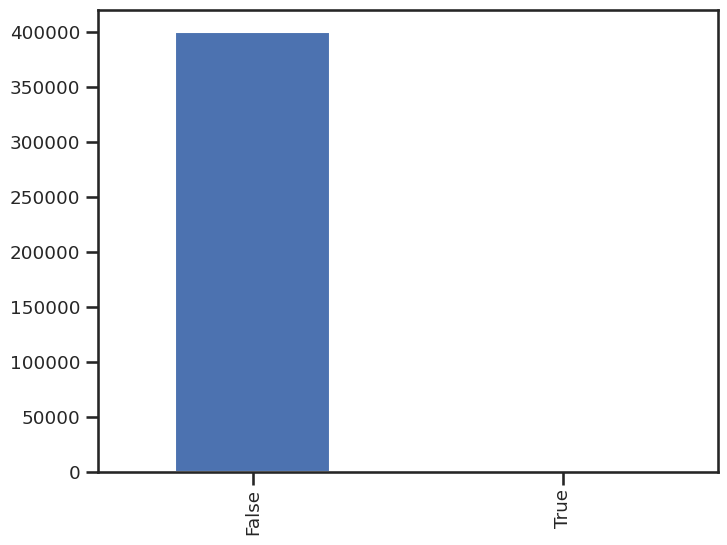

In [79]:
car_sales['crossover_car_and_van'].value_counts().plot.bar();

The feature crossover car and van doesnot seem to affect the price much since there are negligible number of cars with crossover true and there isn't much difference in the price when we compare the price of cars with and without crossover.Thus we removed the feature crossover car and van.

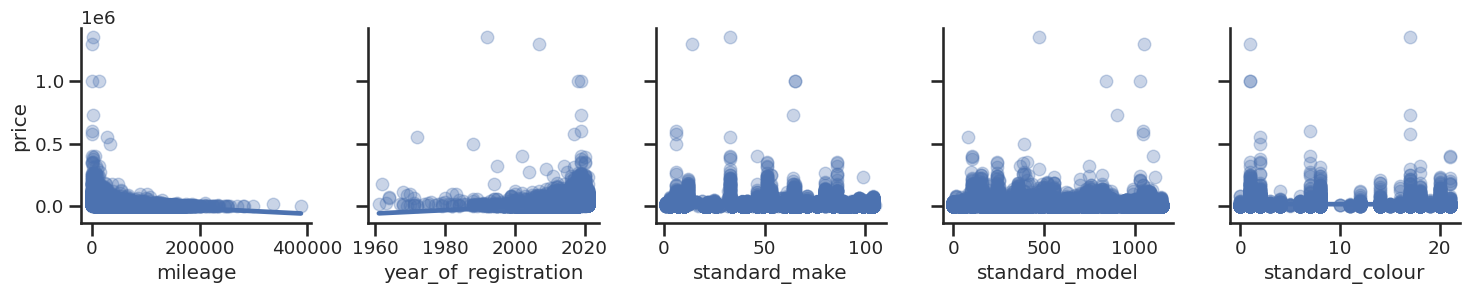

In [80]:
sns.pairplot(
    data=car_sample, x_vars=['mileage','year_of_registration','standard_make','standard_model','standard_colour'], y_vars='price',
    height=3, kind='reg', plot_kws=dict(scatter_kws=(dict(alpha=0.3)))
);

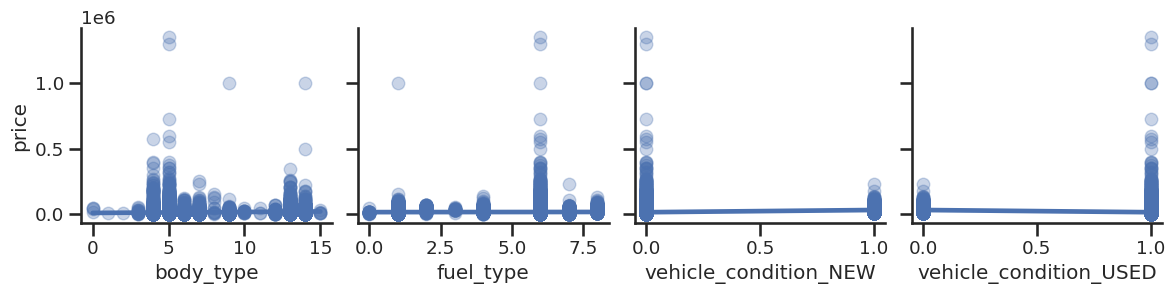

In [81]:
sns.pairplot(
    data=car_sample, x_vars=['body_type','fuel_type','vehicle_condition_NEW','vehicle_condition_USED'], y_vars='price',
    height=3, kind='reg', plot_kws=dict(scatter_kws=(dict(alpha=0.3)))
);

From the EDA, we can infer that year of registration has a direct effect on the price of the car and mileage has an inverse relationship whereas other features has a complex relationship with the target, price.

Automated Feature Selction Algorithms

In [82]:
from sklearn.feature_selection import SelectKBest, f_regression

###### SelectKBest Model

In [83]:
selector = make_pipeline(
    SelectKBest(f_regression, k=30)
).set_output(transform='pandas').fit(X_poly, y_train)
X_sel = selector.transform(X_poly)

In [84]:
X_sel.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,vehicle_condition_NEW,vehicle_condition_USED,mileage^2,mileage standard_colour,...,year_of_registration body_type,year_of_registration vehicle_condition_NEW,year_of_registration vehicle_condition_USED,body_type^2,body_type vehicle_condition_NEW,body_type vehicle_condition_USED,fuel_type^2,vehicle_condition_NEW^2,vehicle_condition_NEW vehicle_condition_USED,vehicle_condition_USED^2
public_reference,,,,,,,,,,,,,,,,,,,,,
202010024511454,0.118669,-1.134797,0.675934,1.457143,-1.234418,-0.645836,-0.294442,0.294442,0.014082,-0.134665,...,0.797232,0.363465,-0.363465,0.417104,0.190162,-0.190162,0.599958,0.086696,-0.086696,0.086696
202010094802414,0.855722,-0.240091,-1.152818,-0.751478,-1.905141,-0.645836,-0.294442,0.294442,0.732261,-0.205451,...,1.230408,0.560954,-0.560954,0.417104,0.190162,-0.190162,0.599958,0.086696,-0.086696,0.086696
202007010752606,-0.964319,0.910246,1.206862,0.026289,0.777750,1.151565,-0.294442,0.294442,0.929910,-0.877767,...,0.895630,-0.229003,0.229003,1.326103,-0.339070,0.339070,1.484752,0.086696,-0.086696,0.086696
202010225293660,0.902029,1.293692,1.206862,1.780718,-0.116547,-0.046702,-0.294442,0.294442,0.813655,1.166947,...,0.005443,0.034316,-0.034316,0.002181,0.013751,-0.013751,0.599958,0.086696,-0.086696,0.086696
202010144973175,-0.177083,-0.240091,0.292486,0.750622,0.554176,1.151565,-0.294442,0.294442,0.031358,0.042516,...,0.638169,-0.163173,0.163173,1.326103,-0.339070,0.339070,1.484752,0.086696,-0.086696,0.086696


In [85]:
model_sel = Ridge().fit(X_sel, y_train)
scores = cross_val_score(model_sel, X_sel, y_train)
scores.mean(), scores.std()

(0.2264459406434492, 0.06478416201791769)

In [86]:
model_train = Ridge().fit(X_train, y_train)
scores = cross_val_score(model_train, X_train, y_train)
scores.mean(), scores.std()

(0.15320228587094223, 0.044820928611496454)

In [87]:
model_poly = Ridge().fit(X_poly, y_train)
scores = cross_val_score(model_poly, X_poly, y_train)
scores.mean(), scores.std()

(0.23985532294359918, 0.06591466843832071)

###### RFECV Model

In [88]:
from sklearn.feature_selection import RFECV

In [89]:
model_ref = Ridge()
ref_selector = RFECV(model_ref, step=1, cv=5)

In [90]:
ref_selector.fit(X_poly, y_train)

RFECV(cv=5, estimator=Ridge())

In [91]:
ref_selector.get_feature_names_out()

array(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'year_of_registration', 'body_type', 'fuel_type', 'mileage^2',
       'mileage standard_colour', 'mileage standard_make',
       'mileage body_type', 'mileage fuel_type',
       'mileage vehicle_condition_NEW', 'mileage vehicle_condition_USED',
       'standard_colour standard_make', 'standard_colour standard_model',
       'standard_make year_of_registration', 'standard_model^2',
       'standard_model year_of_registration', 'standard_model body_type',
       'standard_model vehicle_condition_NEW',
       'standard_model vehicle_condition_USED', 'year_of_registration^2',
       'year_of_registration body_type', 'year_of_registration fuel_type',
       'year_of_registration vehicle_condition_NEW',
       'year_of_registration vehicle_condition_USED', 'body_type^2',
       'body_type fuel_type', 'body_type vehicle_condition_NEW',
       'fuel_type^2', 'fuel_type vehicle_condition_NEW',
       'fuel_type vehic

In [92]:
X_rfe = ref_selector.transform(X_poly)

In [93]:
X_rfe

array([[ 0.11866854, -1.13479742,  0.6759341 , ...,  0.08669636,
        -0.08669636,  0.08669636],
       [ 0.85572222, -0.2400909 , -1.15281836, ...,  0.08669636,
        -0.08669636,  0.08669636],
       [-0.96431864,  0.91024604,  1.20686223, ...,  0.08669636,
        -0.08669636,  0.08669636],
       ...,
       [ 1.66890997,  1.29369169, -1.44777844, ...,  0.08669636,
        -0.08669636,  0.08669636],
       [-0.34534169, -1.0069822 ,  0.11550996, ...,  0.08669636,
        -0.08669636,  0.08669636],
       [-0.70387808, -1.0069822 , -1.59525847, ...,  0.08669636,
        -0.08669636,  0.08669636]])

In [94]:
model_rfe = Ridge().fit(X_rfe, y_train)
scores = cross_val_score(model_rfe, X_rfe, y_train)
scores.mean(), scores.std()

(0.24225714674746152, 0.06577307503214692)

In [95]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

54

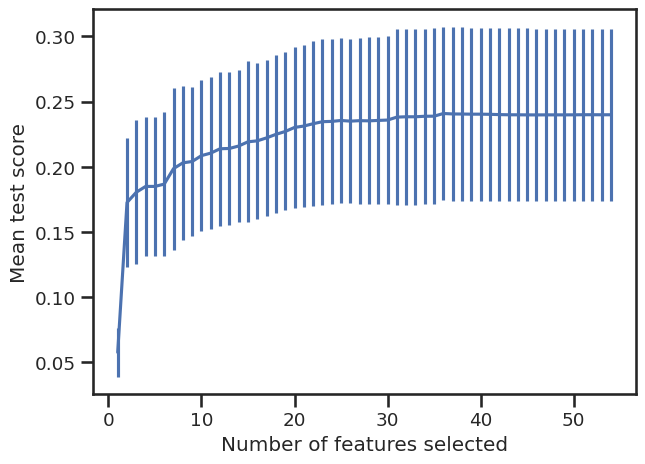

In [96]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

### Sequential Feature Selction

In [97]:
from sklearn.feature_selection import SequentialFeatureSelector

In [98]:
sfs_forward = SequentialFeatureSelector(
    Ridge(), n_features_to_select='auto', direction="forward"
).fit(X_poly, y_train)

In [99]:
sfs_forward.get_feature_names_out()

array(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'year_of_registration', 'body_type', 'fuel_type',
       'vehicle_condition_NEW', 'mileage^2', 'mileage standard_colour',
       'mileage standard_make', 'mileage body_type', 'mileage fuel_type',
       'standard_colour standard_make', 'standard_colour standard_model',
       'standard_model^2', 'standard_model year_of_registration',
       'standard_model body_type', 'standard_model vehicle_condition_NEW',
       'year_of_registration^2', 'year_of_registration body_type',
       'year_of_registration fuel_type', 'body_type^2',
       'body_type fuel_type', 'body_type vehicle_condition_NEW',
       'fuel_type^2', 'fuel_type vehicle_condition_NEW'], dtype=object)

In [100]:
sfs_forward.fit(X_poly,y_train)

SequentialFeatureSelector(estimator=Ridge(), n_features_to_select='auto')

In [101]:
X_sfs = sfs_forward.transform(X_poly)

In [102]:
X_sfs

array([[ 0.11866854, -1.13479742,  0.6759341 , ...,  0.19016151,
         0.59995757, -0.22806608],
       [ 0.85572222, -0.2400909 , -1.15281836, ...,  0.19016151,
         0.59995757, -0.22806608],
       [-0.96431864,  0.91024604,  1.20686223, ..., -0.33906972,
         1.48475205,  0.35877931],
       ...,
       [ 1.66890997,  1.29369169, -1.44777844, ...,  0.45477713,
         0.59995757, -0.22806608],
       [-0.34534169, -1.0069822 ,  0.11550996, ..., -0.42727492,
         1.48475205,  0.35877931],
       [-0.70387808, -1.0069822 , -1.59525847, ...,  0.19016151,
         0.59995757, -0.22806608]])

In [103]:
model_sfs = Ridge().fit(X_sfs, y_train)
scores = cross_val_score(model_sfs, X_sfs, y_train)
scores.mean(), scores.std()

(0.2425700663390126, 0.06743407443755017)

### PCA

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_poly)

In [106]:
X_pca

array([[-1.7680312 ,  0.70178457, -1.20828254, ...,  0.18197329,
        -0.80837395,  0.43319761],
       [-1.46680155,  3.41761625, -0.69202142, ...,  1.21536679,
        -1.3584877 ,  0.57520839],
       [-1.90664775, -0.37536033, -0.70462972, ..., -0.12914498,
        -0.94343551, -0.66981   ],
       ...,
       [-1.26880406,  4.34351389,  1.20114523, ...,  1.20716532,
        -3.7214521 , -0.06048341],
       [-1.91516424, -1.081955  , -0.92769195, ...,  0.40888976,
         0.46873442, -1.51791191],
       [-1.90461707, -1.16725898, -0.57560073, ...,  1.27797473,
        -0.31662088,  0.44618297]])

In [107]:
pca_full = PCA()
pca_full.fit(X_poly)

PCA()

In [108]:
pca_full.explained_variance_ratio_

array([3.86931908e-01, 1.51829393e-01, 5.67931341e-02, 3.73996469e-02,
       3.15139741e-02, 2.55649979e-02, 2.04819659e-02, 1.92250307e-02,
       1.84739027e-02, 1.73154927e-02, 1.61173738e-02, 1.57036148e-02,
       1.50492659e-02, 1.35049508e-02, 1.32131401e-02, 1.26910124e-02,
       1.19662279e-02, 1.13840194e-02, 1.05476296e-02, 1.05056936e-02,
       1.01742769e-02, 9.36630690e-03, 8.64638923e-03, 8.46593521e-03,
       8.05487082e-03, 7.31242762e-03, 7.11619821e-03, 6.61312964e-03,
       5.54688824e-03, 5.34601350e-03, 4.17541948e-03, 3.83396591e-03,
       3.24182999e-03, 3.10159659e-03, 2.78175831e-03, 2.54516573e-03,
       2.28079436e-03, 1.67268265e-03, 1.42849322e-03, 1.17654475e-03,
       9.06936066e-04, 1.33642435e-09, 9.05890572e-28, 4.60979763e-33,
       1.58708877e-33, 1.58708877e-33, 1.58708877e-33, 1.58708877e-33,
       1.58708877e-33, 1.58708877e-33, 1.58708877e-33, 1.58708877e-33,
       5.46412439e-34, 5.38136049e-34])

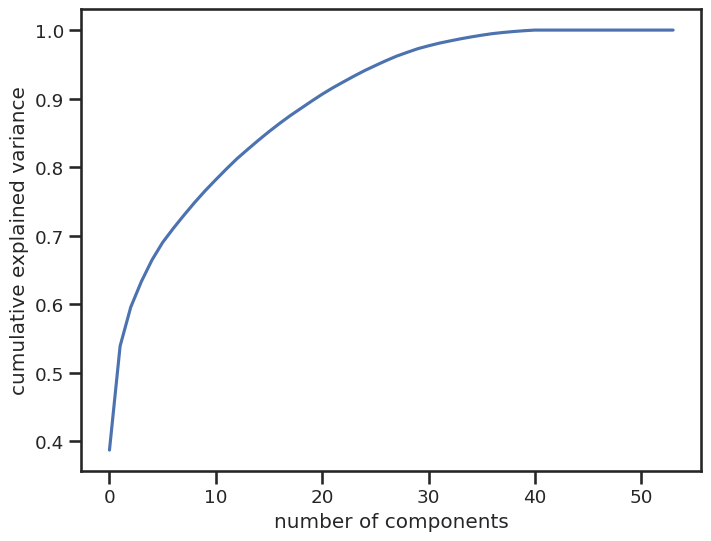

In [109]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# 4. Model Building

A Simple linear model is chosen

## 4.1 Linear Model


In [110]:
car_lm = LinearRegression()

In [111]:
car_lm.fit(X_train, y_train)

LinearRegression()

In [112]:
car_lm.score(X_test,y_test)

0.16989772001946846

In [113]:
rmse(
    y_test,
    car_lm.predict(X_test),
    squared=False
)

18289.90752550435

In [114]:
cvs = cross_val_score(car_lm, X_train, y_train,scoring='neg_root_mean_squared_error')*-1
cvs

array([28038.53451038, 22600.10965303, 15569.87258069, 18622.27794046,
       20092.69548226])

In [115]:
np.mean(cvs), np.std(cvs)

(20984.698033363537, 4196.741490132724)

#### Ridge regression model with regularisation

In [116]:
car_lm_reg = Pipeline(steps=
[
('pp', StandardScaler()),
('est', Ridge(alpha=0.01))
]
).set_output(transform="pandas")

In [117]:
car_lm_reg.fit(X_train, y_train)

Pipeline(steps=[('pp', StandardScaler()), ('est', Ridge(alpha=0.01))])

In [118]:
car_lm_reg['pp'].transform(X_train)

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,vehicle_condition_NEW,vehicle_condition_USED
public_reference,,,,,,,,,
202010024511454,0.118669,-1.134797,0.675934,1.457143,-1.234418,-0.645836,0.774569,-0.294442,0.294442
202010094802414,0.855722,-0.240091,-1.152818,-0.751478,-1.905141,-0.645836,0.774569,-0.294442,0.294442
202007010752606,-0.964319,0.910246,1.206862,0.026289,0.777750,1.151565,-1.218504,-0.294442,0.294442
202010225293660,0.902029,1.293692,1.206862,1.780718,-0.116547,-0.046702,0.774569,-0.294442,0.294442
202010144973175,-0.177083,-0.240091,0.292486,0.750622,0.554176,1.151565,-1.218504,-0.294442,0.294442
...,...,...,...,...,...,...,...,...,...
202010094801957,1.769389,-1.134797,-0.238442,0.851554,-0.563696,1.151565,-1.218504,-0.294442,0.294442
202010295559261,-1.086788,-0.240091,-0.444914,-0.297286,1.224898,1.151565,-1.218504,3.396249,-3.396249
202006200344059,1.668910,1.293692,-1.447778,-0.511023,-1.905141,-1.544537,0.774569,-0.294442,0.294442


In [119]:
rmse(y_test, car_lm_reg.predict(X_test))

18289.907637378594

In [120]:
param_grid = dict(est__alpha=np.logspace(-3, 3, 7))
list(ParameterGrid(param_grid))

[{'est__alpha': 0.001},
 {'est__alpha': 0.01},
 {'est__alpha': 0.1},
 {'est__alpha': 1.0},
 {'est__alpha': 10.0},
 {'est__alpha': 100.0},
 {'est__alpha': 1000.0}]

In [121]:
grid = GridSearchCV(
car_lm_reg, param_grid, scoring='neg_root_mean_squared_error',return_train_score=True
)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pp', StandardScaler()),
                                       ('est', Ridge(alpha=0.01))]),
             param_grid={'est__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [122]:
gs_results = pd.DataFrame(grid.cv_results_)

In [123]:
gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021295,0.002000,0.006108,0.000328,0.001,{'est__alpha': 0.001},-28038.534521,-22600.109665,-15569.872549,-18622.277929,...,-20984.698029,4196.741504,6,-19374.312873,-21076.878800,-22612.162087,-22026.778793,-21701.158358,-21358.258182,1109.232950
1,0.021787,0.005878,0.006774,0.002785,0.01,{'est__alpha': 0.01},-28038.534618,-22600.109771,-15569.872266,-18622.277824,...,-20984.697994,4196.741630,5,-19374.312873,-21076.878800,-22612.162087,-22026.778793,-21701.158358,-21358.258182,1109.232950
2,0.023024,0.001682,0.006902,0.000455,0.1,{'est__alpha': 0.1},-28038.535591,-22600.110836,-15569.869430,-18622.276771,...,-20984.697637,4196.742886,4,-19374.312873,-21076.878800,-22612.162087,-22026.778793,-21701.158358,-21358.258182,1109.232950
3,0.025098,0.001511,0.008035,0.002546,1.0,{'est__alpha': 1.0},-28038.545320,-22600.121482,-15569.841083,-18622.266253,...,-20984.694075,4196.755446,3,-19374.312878,-21076.878803,-22612.162092,-22026.778798,-21701.158362,-21358.258186,1109.232950
4,0.021892,0.000654,0.008304,0.003400,10.0,{'est__alpha': 10.0},-28038.642774,-22600.228033,-15569.558618,-18622.161744,...,-20984.658898,4196.880764,2,-19374.313300,-21076.879162,-22612.162533,-22026.779235,-21701.158743,-21358.258595,1109.232957
5,0.011508,0.002791,0.005591,0.002580,100.0,{'est__alpha': 100.0},-28039.633059,-22601.301919,-15566.832137,-18621.182472,...,-20984.350589,4198.105967,1,-19374.354600,-21076.914278,-22612.205577,-22026.821902,-21701.196049,-21358.298481,1109.233583
6,0.020419,0.005897,0.006413,0.000735,1000.0,{'est__alpha': 1000.0},-28050.682673,-22612.587369,-15547.590761,-18616.694626,...,-20984.726949,4208.025225,7,-19377.685829,-21079.776649,-22615.658091,-22030.240594,-21704.221024,-21361.516437,1109.276423


In [124]:
gs_results[
['param_est__alpha', 'mean_train_score',
'mean_test_score', 'rank_test_score' ]
].sort_values('mean_test_score', ascending=False)

,param_est__alpha,mean_train_score,mean_test_score,rank_test_score
5,100.0,-21358.298481,-20984.350589,1
4,10.0,-21358.258595,-20984.658898,2
3,1.0,-21358.258186,-20984.694075,3
2,0.1,-21358.258182,-20984.697637,4
1,0.01,-21358.258182,-20984.697994,5
0,0.001,-21358.258182,-20984.698029,6
6,1000.0,-21361.516437,-20984.726949,7


In [125]:
car_lm_best_model = grid.best_estimator_

In [126]:
rmse(
    y_test,
    car_lm_best_model.predict(X_test)
)

18291.037118679164

In [127]:
car_lm_best_model.score(X_test,y_test)

0.16979518184924902

## 4.2 A Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rfr = RandomForestRegressor(max_depth=8, min_samples_split=15, 
              min_samples_leaf=8, n_estimators=400)

In [130]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=15,
                      n_estimators=400)

In [131]:
rfr.score(X_test,y_test)

0.5870672765045304

In [132]:
rmse(y_test, rfr.predict(X_test))

12899.870681453438

In [137]:
max_depths=[14,16,18,20]
grid_param ={'max_depth':max_depths,
             'min_samples_leaf':[8],
             'min_samples_split':[15],
             'n_estimators':[400]}

In [138]:
grid = GridSearchCV(RandomForestRegressor(),grid_param,scoring='neg_root_mean_squared_error',return_train_score=True)

In [139]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [14, 16, 18, 20], 'min_samples_leaf': [8],
                         'min_samples_split': [15], 'n_estimators': [400]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [140]:
grid.best_params_

{'max_depth': 16,
 'min_samples_leaf': 8,
 'min_samples_split': 15,
 'n_estimators': 400}

In [141]:
grid.best_score_

-16025.347262035351

In [142]:
grid.cv_results_

{'mean_fit_time': array([18.95565271, 19.68227391, 20.40450563, 19.9882853 ]),
 'std_fit_time': array([0.2367533 , 0.26718739, 0.43123756, 0.27484426]),
 'mean_score_time': array([0.30446124, 0.32856789, 0.34364934, 0.3396481 ]),
 'std_score_time': array([0.01629416, 0.01430259, 0.01807736, 0.01892769]),
 'param_max_depth': masked_array(data=[14, 16, 18, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[8, 8, 8, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[15, 15, 15, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[400, 400, 400, 400],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 14,
   'min_samples_le

#### Model Ranking

In [143]:
gs_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

In [144]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [145]:
gs_results[['param_max_depth','mean_train_score','mean_test_score','rank_test_score']]

,param_max_depth,mean_train_score,mean_test_score,rank_test_score
1,16,-14883.514740,-16025.347262,1
3,20,-14885.204302,-16034.276790,2
2,18,-14878.142696,-16038.384133,3
0,14,-14922.776690,-16069.060924,4


##### Selecting the best model based on rank test score

In [146]:
car_best_rfr=grid.best_estimator_

In [147]:
rmse(car_best_rfr.predict(X_test),y_test)

11337.569093277327

## 4.3 Boosted Tree

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
gbt = GradientBoostingRegressor(max_depth=8, min_samples_split=15, 
              min_samples_leaf=8, n_estimators=400, random_state = 0)

In [150]:
gbt.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=15,
                          n_estimators=400, random_state=0)

In [151]:
gbt.score(X_test,y_test)

0.6840620780899083

In [152]:
rmse(y_test,gbt.predict(X_test))

11283.571492697574

In [154]:
max_depths=[14,16,18,20]
min_leaf = [8]
min_split = [15]
estimators = [400]
grid_param ={ 'max_depth': max_depths,
             'min_samples_leaf': min_leaf,             
             'min_samples_split': min_split,
             'n_estimators': estimators}

In [155]:
grid = GridSearchCV(GradientBoostingRegressor(),grid_param,scoring='neg_root_mean_squared_error',return_train_score=True)

In [156]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [14, 16, 18, 20], 'min_samples_leaf': [8],
                         'min_samples_split': [15], 'n_estimators': [400]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [157]:
grid.best_params_

{'max_depth': 14,
 'min_samples_leaf': 8,
 'min_samples_split': 15,
 'n_estimators': 400}

In [158]:
grid.best_score_

-16185.33841929365

In [159]:
grid.cv_results_

{'mean_fit_time': array([38.262919  , 42.62636771, 47.22228279, 51.30603991]),
 'std_fit_time': array([0.42153602, 0.44296489, 0.26126176, 0.65817439]),
 'mean_score_time': array([0.12073612, 0.14000201, 0.16430759, 0.17945819]),
 'std_score_time': array([0.00232885, 0.00208701, 0.01190585, 0.00340044]),
 'param_max_depth': masked_array(data=[14, 16, 18, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[8, 8, 8, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[15, 15, 15, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[400, 400, 400, 400],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 14,
   'min_samples_le

In [160]:
gs_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

In [161]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [163]:
gs_results[['param_max_depth','mean_test_score','mean_train_score','rank_test_score']]

,param_max_depth,mean_test_score,mean_train_score,rank_test_score
0,14,-16185.338419,-2661.748844,1
1,16,-16189.286217,-2313.962936,2
3,20,-16340.516284,-1993.637687,3
2,18,-16350.969783,-2116.142246,4


In [164]:
car_gbt = grid.best_estimator_

In [165]:
rmse(car_gbt.predict(X_test),y_test)

12203.295070528544

## 4.4  An Averager/Voter/Stacker Ensemble

In [166]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [167]:
hgb = HistGradientBoostingRegressor(random_state =100)

In [168]:
hgb.fit(X_train,y_train)

HistGradientBoostingRegressor(random_state=100)

In [169]:
hgb.score(X_test,y_test)

0.6920644139380341

In [170]:
rmse(y_test,hgb.predict(X_test))

11139.755182263681

In [171]:
from sklearn.ensemble import VotingRegressor

In [172]:
ensembled = [ gbt, rfr, hgb ]

In [173]:
for est in ensembled:
    est.fit(X_train, y_train)

In [174]:
ensemble = VotingRegressor(
    [
        ("gb", gbt), 
        ("rf", rfr), 
        ("hgb", hgb)
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(max_depth=8,
                                                       min_samples_leaf=8,
                                                       min_samples_split=15,
                                                       n_estimators=400,
                                                       random_state=0)),
                            ('rf',
                             RandomForestRegressor(max_depth=8,
                                                   min_samples_leaf=8,
                                                   min_samples_split=15,
                                                   n_estimators=400)),
                            ('hgb',
                             HistGradientBoostingRegressor(random_state=100))])

In [175]:
rmse(ensemble.predict(X_test),y_test)

10720.154892111585

In [176]:
ensemble.score(X_test,y_test)

0.7148254872828521

In [177]:
ensemble.score(X_train,y_train)

0.7784787114862208

# 5. Model Evaluation and Analysis

## 5.1 Overall Performance with Cross-Validation

In [180]:
# 1. Simple Linear model
scores = cross_val_score(car_lm_best_model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
scores.mean()*-1, scores.std()

(20605.796868743262, 5782.6459103200805)

In [181]:
# 2. RandomForestRegressor
scores = cross_val_score(car_best_rfr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
scores.mean()*-1, scores.std()

(15268.548322997904, 6516.205219306573)

In [182]:
# 3. GradientBoostingRegressor
scores = cross_val_score(gbt, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
scores.mean()*-1, scores.std()

(14695.366230186957, 6224.400535468487)

In [183]:
# 4. HistGradientBoostingRegressor
scores = cross_val_score(hgb, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
scores.mean()*-1, scores.std()

(14650.100157474406, 6475.467701765259)

In [184]:
# 5. Ensemble (Voting Regressor)
scores = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
scores.mean()*-1, scores.std()

(14418.802596499623, 6547.535087303291)

## 5.2 True vs Predicted Analysis

In [ ]:
# 1. Ensemble (Voting Regressor)


In [186]:
y_pred = ensemble.predict(X_test)
y_true = y_test

In [187]:
mse = np.mean((y_pred - y_true) ** 2)

In [188]:
rmse = np.sqrt(mse)


In [189]:
mae = np.mean(np.abs(y_pred - y_true)) # Mean Absolute Error, the lower the better

In [190]:
mae

3541.239614244397

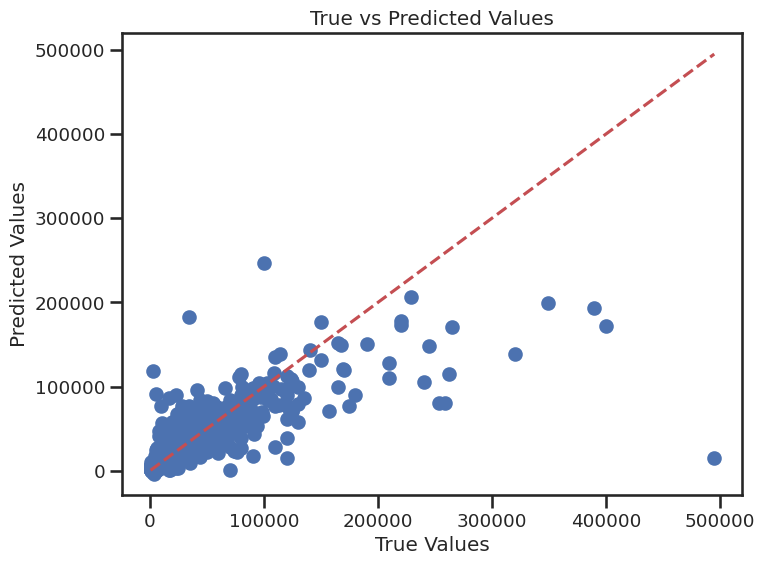

In [192]:
plt.scatter(y_true, y_pred)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # Plotting a diagonal line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

####  HistGradientBoosting Regressor

In [193]:
y_pred = hgb.predict(X_test)
y_true = y_test

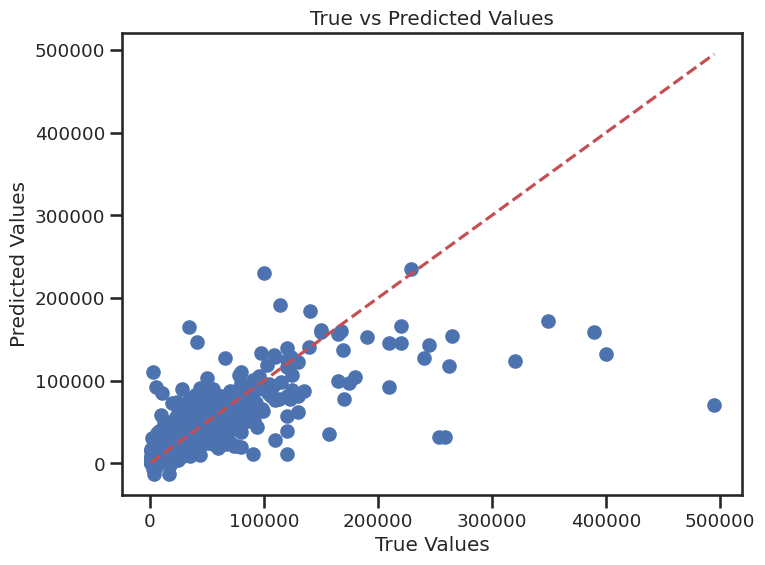

In [194]:
plt.scatter(y_true, y_pred)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # Plotting a diagonal line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

#### GradientBoosting Regressor

In [195]:
y_pred = gbt.predict(X_test)
y_true = y_test

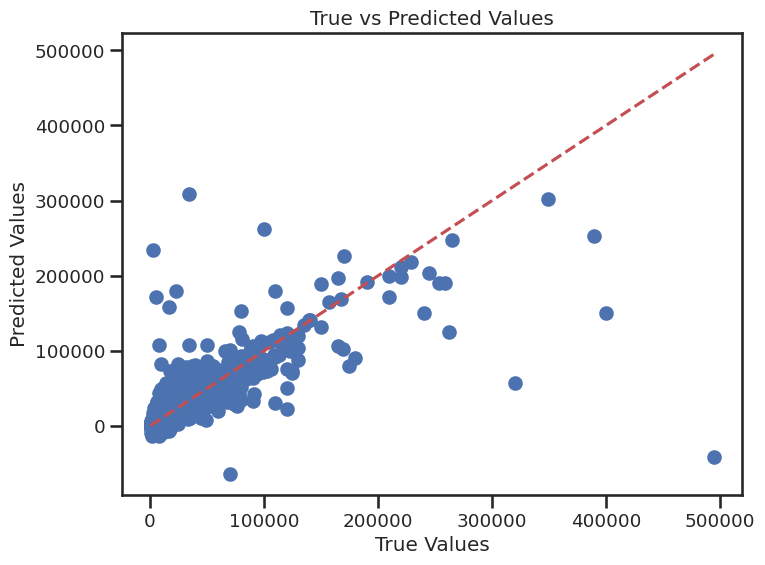

In [196]:
plt.scatter(y_true, y_pred)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # Plotting a diagonal line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

##### RandomForest Regressor

In [197]:
y_pred = car_best_rfr.predict(X_test)
y_true = y_test

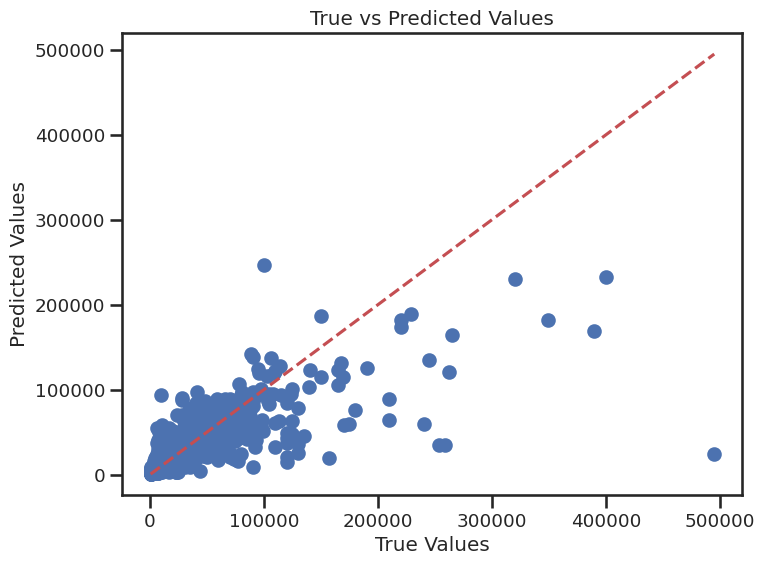

In [198]:
plt.scatter(y_true, y_pred)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # Plotting a diagonal line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

##### Linear Regressor

In [199]:
y_pred = car_lm_best_model.predict(X_test)
y_true = y_test

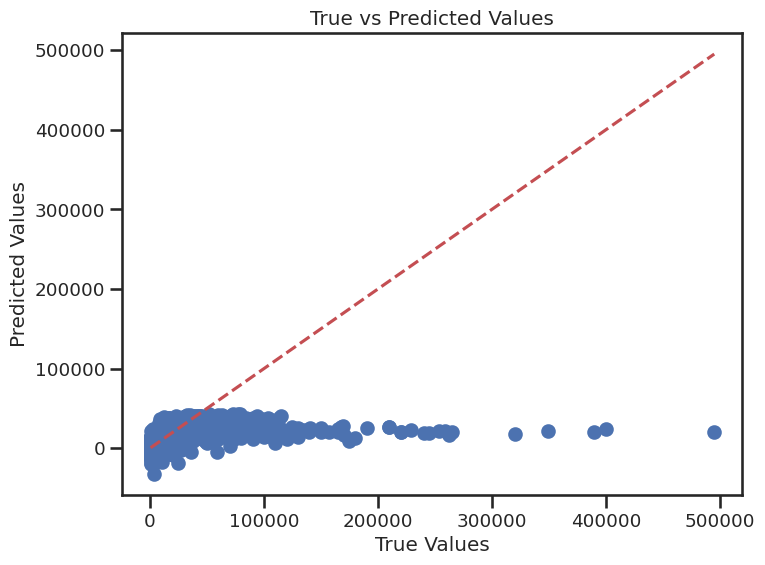

In [200]:
plt.scatter(y_true, y_pred)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # Plotting a diagonal line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

## 5.3 Global and Local Explanations with SHAP

In [201]:
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.8 MB/s eta 0:00:00


In [203]:
numeric_features = X_train.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')

In [204]:
categorical_features = X_train.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')),
    ]
).set_output(transform='pandas')

In [205]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [206]:
regr_model = HistGradientBoostingRegressor(random_state =100)


In [207]:
regr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regr", regr_model)
    ]
).set_output(transform="pandas")

In [208]:
regr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'year_of_registration',
                                                   'body_type', 'fuel_type',
                                                   'vehicle_condition_NEW',
                                                   'vehicle_condition_USED']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('regr', HistGradientBoostingRegressor(random_state=100))])

In [209]:
regr_pipe.score(X_test, y_test)

0.6920644139380341

### Global Explanation of the HistGradient Boosting Regressor using Shap

In [210]:
explainer = shap.TreeExplainer(regr_pipe['regr'])

In [211]:
shap_values = explainer.shap_values(
    regr_pipe['preprocessor'].transform(X)
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


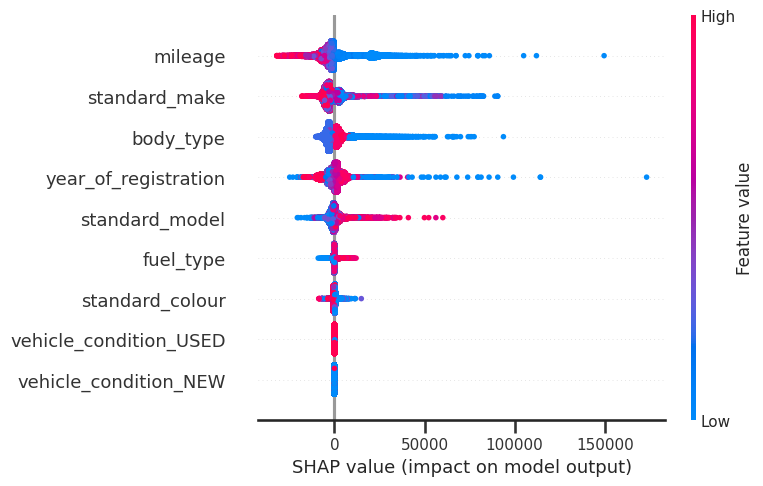

In [214]:
shap.summary_plot(
    shap_values, 
    regr_pipe['preprocessor'].transform(X)
);

In [215]:
feature_names = regr_pipe['preprocessor'].transform(X).columns

#### Feature importance using Shap values

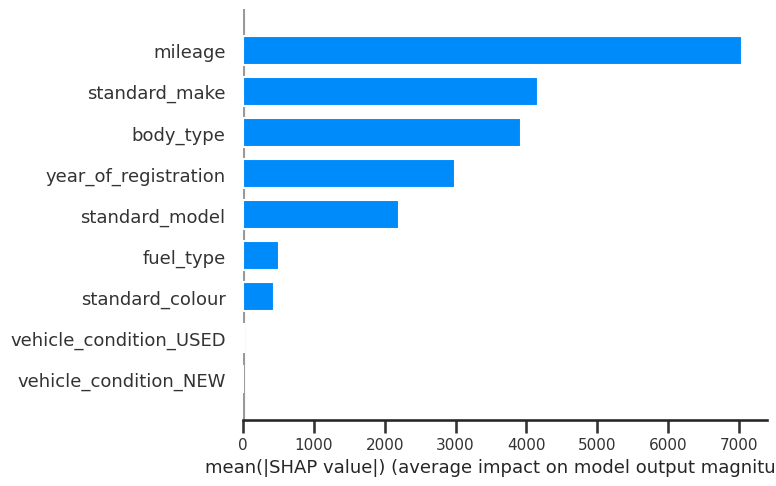

In [216]:
shap.summary_plot(
    shap_values, feature_names, plot_type="bar"
)

#### Local explanation by taking 10 instances of the test data 

In [217]:
X_pp = regr_pipe['preprocessor'].transform(X_test)

In [218]:
X10 = shap.utils.sample(X_pp, 10) # 10 instances 

In [219]:
explainer = shap.Explainer(regr_pipe['regr'].predict, X10)
shap_values = explainer(X_pp)

Exact explainer: 7992it [02:00, 62.53it/s]                          


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


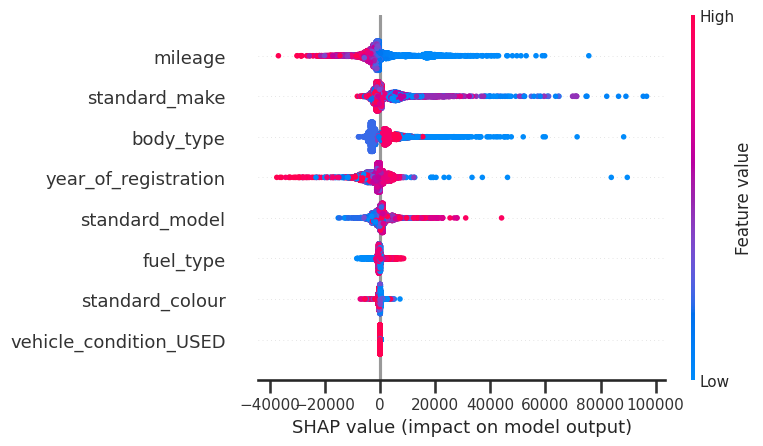

In [220]:
shap.summary_plot(shap_values, X_pp, max_display=8)

## 5.4 Partial Dependency Plots

In [223]:
from sklearn.inspection import PartialDependenceDisplay

#### Partial Dependency plot for the features of interest 'mileage' and 'year of registration' are given below

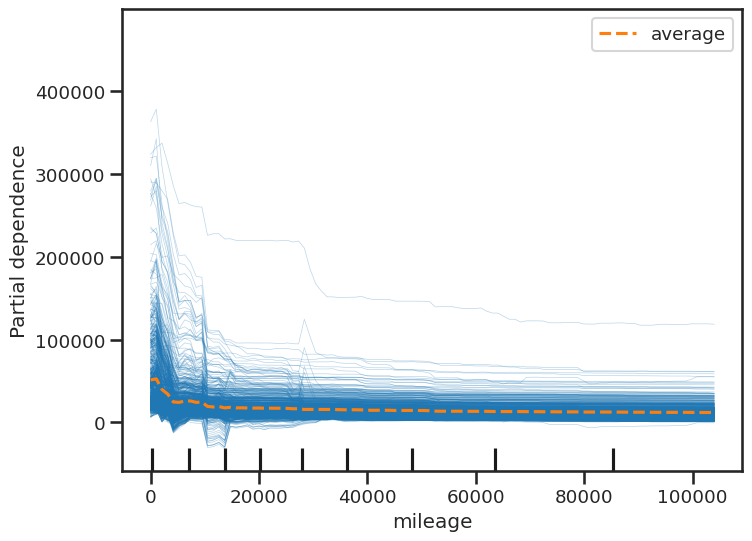

In [229]:
PartialDependenceDisplay.from_estimator(
    ensemble, X_test, features=['mileage'], kind='both'
);

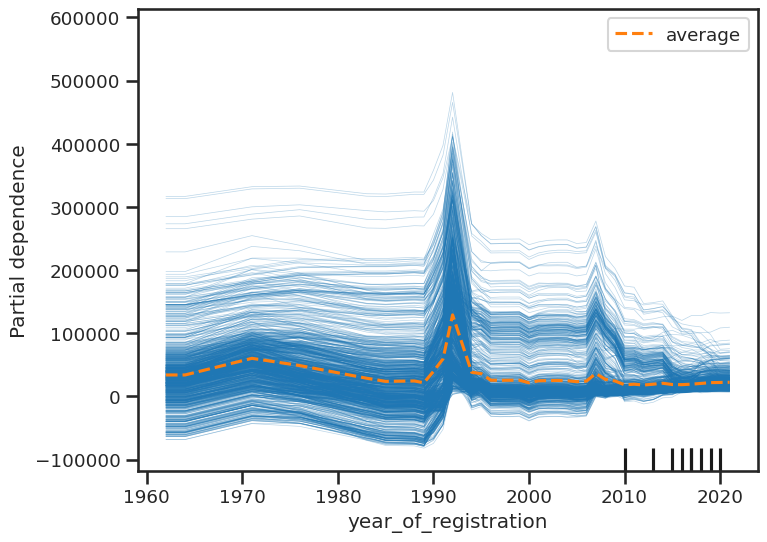

In [226]:
PartialDependenceDisplay.from_estimator(
    ensemble, X_test, features=['year_of_registration'], kind='both'
);

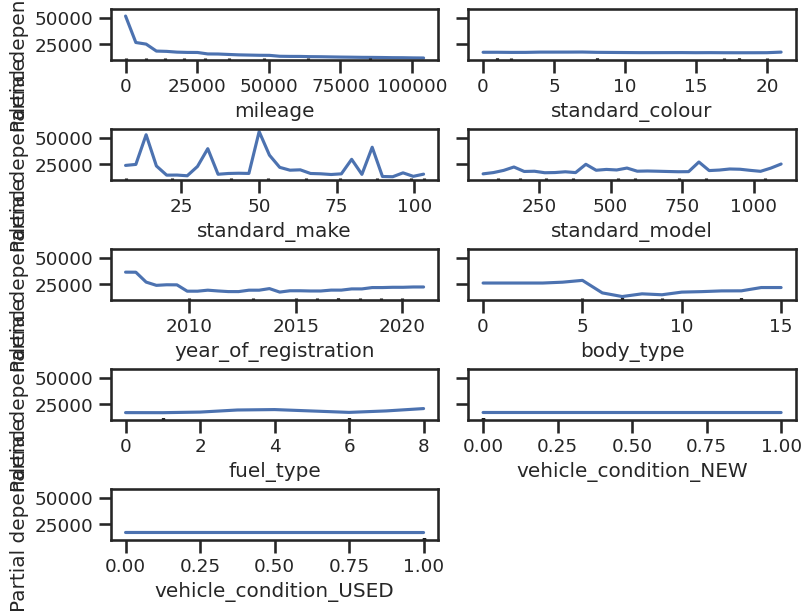

In [231]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    ensemble, X_test, features=X_test.select_dtypes(exclude='object').columns,
    kind='average', 
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);